In [2]:
from Camera import Camera
from Image import Image
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

exp = '2022_01_31'
drive_path = f'G:/My Drive/{exp}'
path = f'{drive_path}'
mov = 15
frame = 210
frame_sparse = 210+71


cameras = {f'cam{cam}':Camera(path,cam) for cam in [1,2,3,4]}
images = {f'cam{cam}':Image(path,cam,mov) for cam in [1,2,3,4]}
mesh = o3d.io.read_triangle_mesh(f'{path}/3d_data/mov{mov}_frame{frame}.ply')
points = np.asarray(mesh.vertices)




Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:


crop_pixels = np.array([images[f'cam{cam}'].load_frame_and_size_of_crop(frame_sparse) for cam in [1,2,3,4]])
crop_size = np.max(crop_pixels[:,1::2] - crop_pixels[:,::2],axis = 0) + 1
croped_images = [images[f'cam{cam}'].crop_image(crop_size,dy_crop = 5,dx_crop = 20) for cam in [1,2,3,4]]
[cameras[f'cam{cam}'].camera_calibration_crop(images[f'cam{cam}'].crop_bot_left) for cam in [1,2,3,4]]
points_2d = [cameras[f'cam{cam}'].project_on_cam(points) for cam in [1,2,3,4]]



In [11]:
cameras[f'cam1'].cam_matrix

array([[ 1.18344767e+04,  1.12133279e+04, -1.65106968e+04,
         1.60879873e+01],
       [-1.00862930e+04, -1.32492481e+04, -1.62777378e+04,
         3.20767203e+02],
       [ 3.74429984e+00, -3.61791516e+00,  7.55602394e-02,
         1.00000000e+00]])

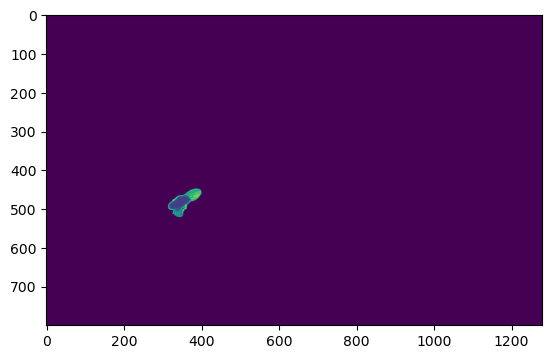

In [11]:
images['cam3'].get_frame(210+71)
wak = images['cam3'].gen_image(image_size = [800,1280])
plt.imshow(wak)

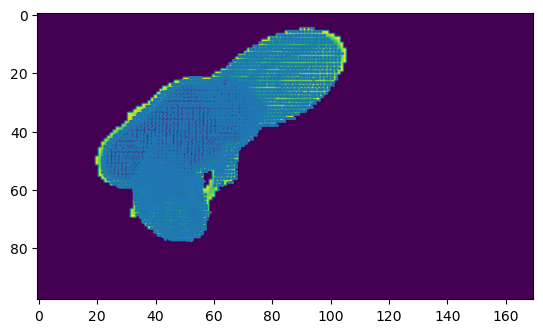

In [14]:
cam_num = 2
plt.imshow(croped_images[cam_num])
plt.scatter(points_2d[cam_num][:,0],croped_images[cam_num].shape[0] - points_2d[cam_num][:,1],s = 1)
